In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/telco-customer-churn-ibm-dataset/Telco_customer_churn.xlsx


In [28]:
'''### **Real-Life Business Analysis Job Simulation: Customer Churn Analysis for a Subscription-Based Business**  

#### **Business Context:**  
You are working as a **Data Analyst** for a **subscription-based streaming service (like Netflix or Spotify)** that provides on-demand entertainment. The company wants to **reduce customer churn** and **improve user retention** by identifying key factors contributing to churn.  

#### **Your Objectives:**  
- Analyze **customer churn behavior** (Why are users canceling their subscriptions?).  
- Identify patterns related to churn (e.g., usage frequency, subscription plan, demographics).  
- Recommend **strategies to retain customers** and **reduce churn rate**.  

---

### **Dataset for Analysis:**  
You can use the **“Telco Customer Churn” dataset from Kaggle**, which contains information about customer demographics, service usage, and churn status.  

**Download Dataset:** [Telco Customer Churn - Kaggle](https://www.kaggle.com/datasets/blastchar/telco-customer-churn)  

---

### **Dataset Information:**  
- **Customer ID:** Unique identifier for each customer.  
- **Gender, Senior Citizen, Partner, Dependents:** Customer demographics.  
- **Tenure:** How long the customer has been subscribed.  
- **Monthly Charges & Total Charges:** Subscription cost details.  
- **Payment Method:** Auto-payment or manual payment.  
- **Internet Service & Contract Type:** Service details (Fiber Optic, DSL, etc.).  
- **Churn:** Whether the customer left or stayed (target variable).  

---

### **Hints for Analysis:**  
1️⃣ **Identify churn rates:** What percentage of users have churned?  
2️⃣ **Compare Tenure vs. Churn:** Do new customers churn more than long-term customers?  
3️⃣ **Analyze Payment Methods:** Are manual payment users more likely to churn than auto-pay users?  
4️⃣ **Check Monthly Charges Impact:** Do higher charges lead to more cancellations?  
5️⃣ **Demographics vs. Churn:** Are senior citizens or customers with dependents more likely to leave?  

---

### **Expected Deliverables:**  
✅ **Exploratory Data Analysis (EDA):** Identify churn patterns and trends.  
✅ **Visualization (Bar charts, heatmaps, line graphs, etc.).**  
✅ **Business Insights & Recommendations.**  
✅ **A short report summarizing findings.**  
'''

'### **Real-Life Business Analysis Job Simulation: Customer Churn Analysis for a Subscription-Based Business**  \n\n#### **Business Context:**  \nYou are working as a **Data Analyst** for a **subscription-based streaming service (like Netflix or Spotify)** that provides on-demand entertainment. The company wants to **reduce customer churn** and **improve user retention** by identifying key factors contributing to churn.  \n\n#### **Your Objectives:**  \n- Analyze **customer churn behavior** (Why are users canceling their subscriptions?).  \n- Identify patterns related to churn (e.g., usage frequency, subscription plan, demographics).  \n- Recommend **strategies to retain customers** and **reduce churn rate**.  \n\n---\n\n### **Dataset for Analysis:**  \nYou can use the **“Telco Customer Churn” dataset from Kaggle**, which contains information about customer demographics, service usage, and churn status.  \n\n**Download Dataset:** [Telco Customer Churn - Kaggle](https://www.kaggle.com/d

In [2]:
file_path="/kaggle/input/telco-customer-churn-ibm-dataset/Telco_customer_churn.xlsx"
df=pd.read_excel(file_path)
df

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,2569-WGERO,1,United States,California,Landers,92285,"34.341737, -116.539416",34.341737,-116.539416,Female,...,Two year,Yes,Bank transfer (automatic),21.15,1419.4,No,0,45,5306,NaN
7039,6840-RESVB,1,United States,California,Adelanto,92301,"34.667815, -117.536183",34.667815,-117.536183,Male,...,One year,Yes,Mailed check,84.80,1990.5,No,0,59,2140,NaN
7040,2234-XADUH,1,United States,California,Amboy,92304,"34.559882, -115.637164",34.559882,-115.637164,Female,...,One year,Yes,Credit card (automatic),103.20,7362.9,No,0,71,5560,NaN
7041,4801-JZAZL,1,United States,California,Angelus Oaks,92305,"34.1678, -116.86433",34.167800,-116.864330,Female,...,Month-to-month,Yes,Electronic check,29.60,346.45,No,0,59,2793,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

In [4]:
df['CLTV']

0       3239
1       2701
2       5372
3       5003
4       5340
        ... 
7038    5306
7039    2140
7040    5560
7041    2793
7042    5097
Name: CLTV, Length: 7043, dtype: int64

# Identify churn rates:** What percentage of users have churned?

In [5]:
#Total customers
df['CustomerID'].value_counts().sum()

7043

In [6]:
#churned customers
(df['Churn Value']==1).sum()

1869

In [66]:
percentage_churn=((df['Churn Value']==1).sum()/df['CustomerID'].value_counts().sum())*100
percentage_churn
# 26 percentage of the customers churned

26.536987079369588

# Compare Tenure vs. Churn

In [76]:
df["Tenure Months"].describe()


count    7043.000000
mean       32.371149
std        24.559481
min         0.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: Tenure Months, dtype: float64

<Axes: >

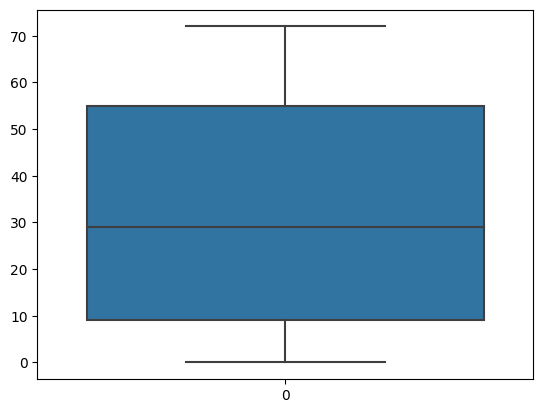

In [8]:
sns.boxplot(df["Tenure Months"])

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Tenure Months', ylabel='Count'>

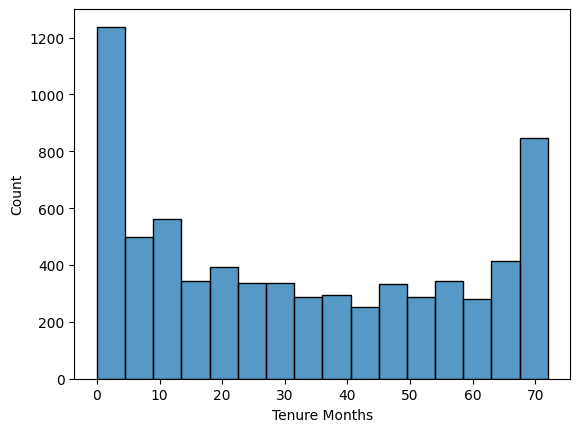

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.histplot(df["Tenure Months"])

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Tenure Months', ylabel='Density'>

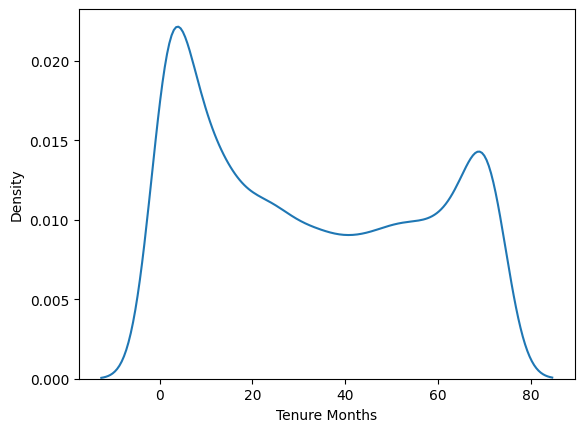

In [10]:
sns.kdeplot(df["Tenure Months"])

In [12]:
df.groupby('Churn Value')['Tenure Months'].mean()

'''Meaning The customers who churned had an average of 17.98 months of Tenure i.e The persons with lower
Tenure Months(Newer customer) churned and the customers who had higher Tenure Months(older customer) didn;t churn. '''

Churn Value
0    37.569965
1    17.979133
Name: Tenure Months, dtype: float64

In [13]:
df.groupby('Churn Value')['Tenure Months'].median()

Churn Value
0    38.0
1    10.0
Name: Tenure Months, dtype: float64

<Axes: >

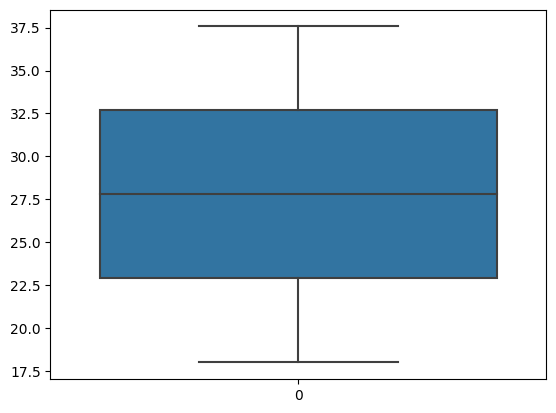

In [14]:
sns.boxplot(df.groupby('Churn Value')['Tenure Months'].mean())

# Analyze Payment Methods

Are manual payment users more likely to churn than auto-pay users?

In [ ]:
df.groupby()

In [93]:
df['Churn Value'].unique()

array([1, 0])

In [18]:
df['Payment Method'].unique()

array(['Mailed check', 'Electronic check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [26]:
df['Payment Method'].value_counts()

Payment Method
Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: count, dtype: int64

In [27]:
#churn value by payment methos
df.groupby("Payment Method")['Churn Value'].mean()

Payment Method
Bank transfer (automatic)    0.167098
Credit card (automatic)      0.152431
Electronic check             0.452854
Mailed check                 0.191067
Name: Churn Value, dtype: float64

In [ ]:
# Means customers who manually pay checks are more likey to check and those whose payment method is automatic are less likely to churn
#

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:486: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if np.isscalar(data[0]):


<Axes: >

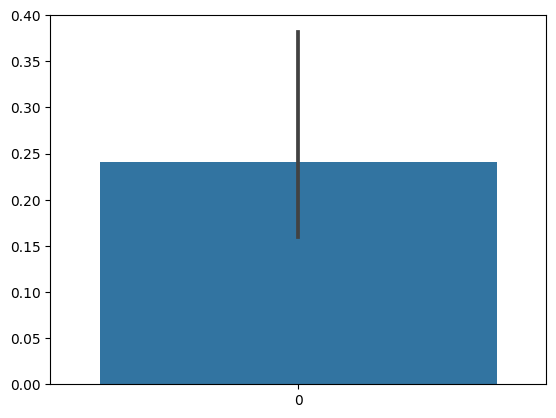

In [31]:
sns.barplot(df.groupby("Payment Method")['Churn Value'].mean())

In [ ]:
# (Mailed check and Electronic check)=Manual , (bank transfer and credit card)=automatic

In [24]:
manual_pay=(df['Payment Method']=='Mailed check').sum() + (df['Payment Method']=='Electronic check').sum()
manual_pay

3977

In [25]:
auto_pay=(df['Payment Method']=='Bank transfer (automatic)').sum() + (df['Payment Method']=='Credit card (automatic)').sum()
auto_pay

3066

In [86]:
df.groupby('Churn Value')['Payment Method']

#  Check Monthly Charges Impact: Do higher charges lead to more cancellations?

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

In [34]:
df['Monthly Charges'].describe()

count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
25%        35.500000
50%        70.350000
75%        89.850000
max       118.750000
Name: Monthly Charges, dtype: float64

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Monthly Charges', ylabel='Count'>

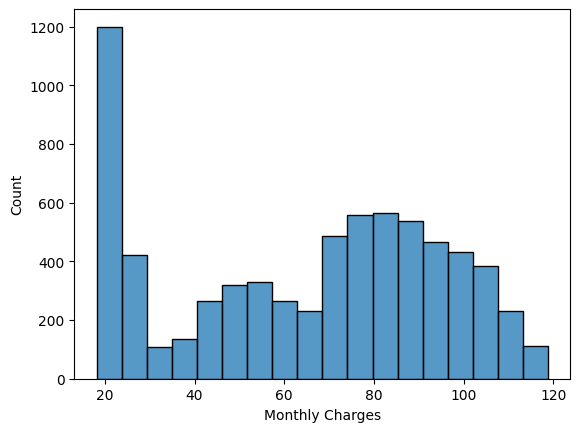

In [45]:
sns.histplot(df['Monthly Charges'])

In [49]:
df.groupby('Monthly Charges')['Churn Value'].mean()
# not make sense

Monthly Charges
18.25     0.0
18.40     0.0
18.55     0.0
18.70     0.0
18.75     0.0
         ... 
118.20    0.0
118.35    1.0
118.60    0.0
118.65    0.0
118.75    0.0
Name: Churn Value, Length: 1585, dtype: float64

In [55]:
#avg monthly charges by churn value
df.groupby('Churn Value')['Monthly Charges'].mean()

Churn Value
0    61.265124
1    74.441332
Name: Monthly Charges, dtype: float64

<Axes: >

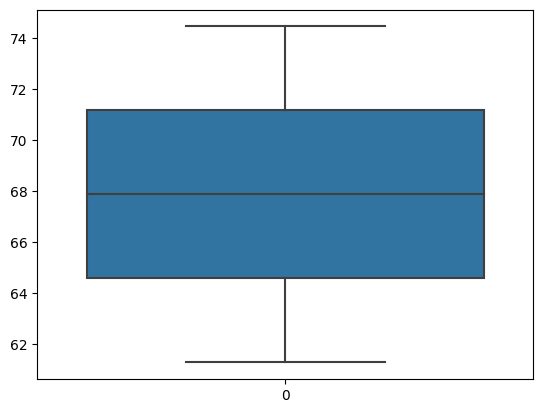

In [47]:
sns.boxplot(df.groupby('Churn Value')['Monthly Charges'].mean())

# Demographics vs. Churn: Are senior citizens or customers with dependents more likely to leave?

In [68]:
df.groupby("Churn Value")['Dependents'].count()
 #not dependents and not churned=5174 i.e 

Churn Value
0    5174
1    1869
Name: Dependents, dtype: int64

In [70]:
df.groupby("Dependents")['Churn Value'].mean()

Dependents
No     0.325517
Yes    0.065151
Name: Churn Value, dtype: float64

In [69]:
df['Dependents'].describe()

count     7043
unique       2
top         No
freq      5416
Name: Dependents, dtype: object